In [ ]:
# draw results

In [19]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(font_scale=1.3)

In [20]:
rolling_frame = 100
steps = 2000
frame_size = 1
env_path = ''
logs_path = env_path + 'results/'
figure_path = env_path + 'figures/'
# logs_path = env_path + 'results/' + sub_name
file_names = ['Results_Sim4_1_1_updated_base.csv', 'Results_Sim5_1_1_updated_base.csv', 'Results_Sim6_1_1_updated_base.csv']
labels = ['Share-all', 'Share-rules', 'Exanna']
# colors = np.array(['tab:green', 'tab:red', 'tab:blue', 'yellow'])
colors = ['tab:green', 'tab:red', 'tab:blue', 'purple', 'orange', 'maroon', 'cyan', 'brown', 'pink', 'gray', 'aqua', 'lightcoral', 'olive', 'coral', 'tab:blue', 'blue']

In [21]:
dataframes = []
for idx in range(len(file_names)):
    dataframe = pd.read_csv(logs_path + file_names[idx])
    dataframes.append(dataframe)

/tmp/ipykernel_559987/2921910351.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xlabels)


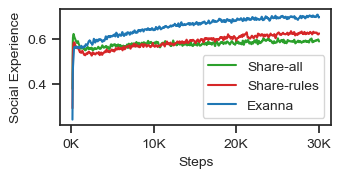

In [6]:
attribute = 'Payoff_Per_Interaction'
sns.set_theme(style="ticks")

fig, ax = plt.subplots()
ax.set_xlabel('Steps', fontsize=10, weight='normal')
ax.set_ylabel('Social Experience', fontsize=10, weight='normal')

ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

plt.rcParams["figure.figsize"] = (3.5,1.5)
plt.rc('font', weight='normal')
plt.rc('legend', fontsize=10)

for idx in range(len(file_names)):    
    dataframes[idx][attribute] = dataframes[idx][attribute].rolling(rolling_frame).mean()
    dataframes[idx][attribute].plot(color=colors[idx], label=labels[idx])

ax.legend()
current_labels = plt.gca().get_xticks()
current_labels = [int(x)/1000 for x in current_labels]
xlabels = ['{:,.0f}'.format(x) + 'K' for x in current_labels]
plt.gca().set_xticklabels(xlabels)

plt.savefig(figure_path + "Social_Experience.pdf", format="pdf", bbox_inches="tight")
plt.show()


/tmp/ipykernel_559987/3478520177.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xlabels)


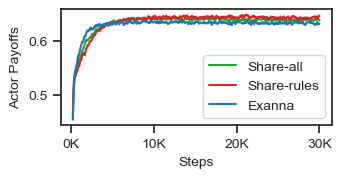

In [8]:
agent_types = ['health', 'freedom']
agent_labels = np.array(["Expected_Actor_Payoff_for_{}_agents".format(x) for x in agent_types])
sns.set_theme(style="ticks")

fig, ax = plt.subplots()
# ax.set(xlabel = 'Steps', ylabel = 'Actor Payoffs')

ax.set_xlabel('Steps', fontsize=10, fontweight='normal')
ax.set_ylabel('Actor Payoffs', fontsize=10, fontweight='normal')

ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

plt.rcParams["figure.figsize"] = (3.5,1.5)
plt.rc('font', weight='normal')
plt.rc('legend', fontsize=10)

for idx in range(len(file_names)):   
    for agentId in range(len(agent_types)):
        agent_label = agent_labels[agentId]
        if agent_types[agentId] == 'health':
            show_label = labels[idx] # + ": " + agent_types[agentId]
            dataframes[idx][agent_labels[agentId]] = dataframes[idx][agent_labels[agentId]].rolling(rolling_frame).mean()
            dataframes[idx][agent_labels[agentId]].plot(color=colors[idx], label=show_label)

ax.legend()

current_labels = plt.gca().get_xticks()
current_labels = [int(x)/1000 for x in current_labels]
xlabels = ['{:,.0f}'.format(x) + 'K' for x in current_labels]
plt.gca().set_xticklabels(xlabels)

plt.savefig(figure_path + "Actor_Payoffs_health.pdf", format="pdf", bbox_inches="tight")
plt.show()

/tmp/ipykernel_559987/1467472514.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xlabels)


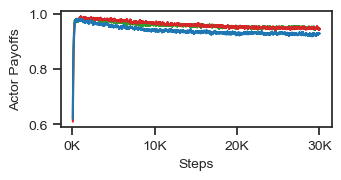

In [9]:
agent_types = ['health', 'freedom']
agent_labels = np.array(["Expected_Actor_Payoff_for_{}_agents".format(x) for x in agent_types])
sns.set_theme(style="ticks")

fig, ax = plt.subplots()
# ax.set(xlabel = 'Steps', ylabel = 'Actor Payoffs')

ax.set_xlabel('Steps', fontsize=10, fontweight='normal')
ax.set_ylabel('Actor Payoffs', fontsize=10, fontweight='normal')

ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

plt.rcParams["figure.figsize"] = (3.5,1.5)
plt.rc('font', weight='normal')
plt.rc('legend', fontsize=10)

for idx in range(len(file_names)):   
    for agentId in range(len(agent_types)):
        agent_label = agent_labels[agentId]
        if agent_types[agentId] == 'freedom':
            show_label = labels[idx] # + ": " + agent_types[agentId]
            dataframes[idx][agent_labels[agentId]] = dataframes[idx][agent_labels[agentId]].rolling(rolling_frame).mean()
#         dataframes[idx][agent_labels[agentId]].plot(color=colors[idx * 2 + agentId], label=show_label)
            dataframes[idx][agent_labels[agentId]].plot(color=colors[idx], label=show_label)

# ax.legend()

current_labels = plt.gca().get_xticks()
current_labels = [int(x)/1000 for x in current_labels]
xlabels = ['{:,.0f}'.format(x) + 'K' for x in current_labels]
plt.gca().set_xticklabels(xlabels)

plt.savefig(figure_path + "Actor_Payoffs_freedom.pdf", format="pdf", bbox_inches="tight")
plt.show()

/tmp/ipykernel_559987/1564937441.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xlabels)


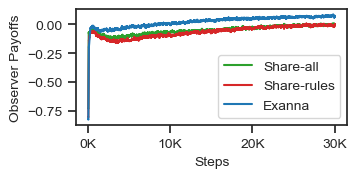

In [10]:
agent_types = ['health', 'freedom']
agent_labels = np.array(["Expected_Observer_Payoff_for_{}_agents".format(x) for x in agent_types])
sns.set_theme(style="ticks")

fig, ax = plt.subplots()
# ax.set(xlabel = 'Steps', ylabel = 'Observer Payoffs')

ax.set_xlabel('Steps', fontsize=10, fontweight='normal')
ax.set_ylabel('Observer Payoffs', fontsize=10, fontweight='normal')

ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

plt.rcParams["figure.figsize"] = (3.5,1.5)
plt.rc('font', weight='normal')
plt.rc('legend', fontsize=10)

for idx in range(len(file_names)):   
    for agentId in range(len(agent_types)):
        agent_label = agent_labels[agentId]
        if agent_types[agentId] == 'health':
            show_label = labels[idx] # + ": " + agent_types[agentId]
            dataframes[idx][agent_labels[agentId]] = dataframes[idx][agent_labels[agentId]].rolling(rolling_frame).mean()
#             dataframes[idx][agent_labels[agentId]].plot(color=colors[idx * 2 + agentId], label=show_label)
            dataframes[idx][agent_labels[agentId]].plot(color=colors[idx], label=show_label)

ax.legend()

current_labels = plt.gca().get_xticks()
current_labels = [int(x)/1000 for x in current_labels]
xlabels = ['{:,.0f}'.format(x) + 'K' for x in current_labels]
plt.gca().set_xticklabels(xlabels)

plt.savefig(figure_path + "Observer_Payoffs_health.pdf", format="pdf", bbox_inches="tight")
plt.show()

/tmp/ipykernel_559987/3212779810.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xlabels)


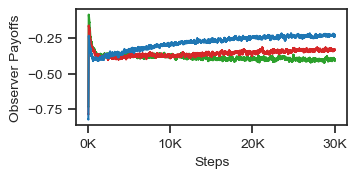

In [11]:
agent_types = ['health', 'freedom']
agent_labels = np.array(["Expected_Observer_Payoff_for_{}_agents".format(x) for x in agent_types])
sns.set_theme(style="ticks")

fig, ax = plt.subplots()
# ax.set(xlabel = 'Steps', ylabel = 'Observer Payoffs')

ax.set_xlabel('Steps', fontsize=10, fontweight='normal')
ax.set_ylabel('Observer Payoffs', fontsize=10, fontweight='normal')

ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

plt.rcParams["figure.figsize"] = (3.5,1.5)
plt.rc('font', weight='normal')
plt.rc('legend', fontsize=10)

for idx in range(len(file_names)):   
    for agentId in range(len(agent_types)):
        agent_label = agent_labels[agentId]
        if agent_types[agentId] == 'freedom':
            show_label = labels[idx] # + ": " + agent_types[agentId]
            dataframes[idx][agent_labels[agentId]] = dataframes[idx][agent_labels[agentId]].rolling(rolling_frame).mean()
#             dataframes[idx][agent_labels[agentId]].plot(color=colors[idx * 2 + agentId], label=show_label)
            dataframes[idx][agent_labels[agentId]].plot(color=colors[idx], label=show_label)

# ax.legend()

current_labels = plt.gca().get_xticks()
current_labels = [int(x)/1000 for x in current_labels]
xlabels = ['{:,.0f}'.format(x) + 'K' for x in current_labels]
plt.gca().set_xticklabels(xlabels)

plt.savefig(figure_path + "Observer_Payoffs_freedom.pdf", format="pdf", bbox_inches="tight")
plt.show()

<ipython-input-10-5c59b643b8f1>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xlabels)


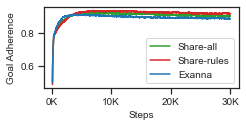

In [10]:
attribute = 'Satisfaction_Per_Interaction'
sns.set_theme(style="ticks")

fig, ax = plt.subplots()
# ax.set(xlabel = 'Steps', ylabel = 'Goal Adherence')

ax.set_xlabel('Steps', fontsize=10, fontweight='normal')
ax.set_ylabel('Goal Adherence', fontsize=10, fontweight='normal')

ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

plt.rcParams["figure.figsize"] = (3.5,1.5)
plt.rc('font', weight='normal')
plt.rc('legend', fontsize=10)
   
for idx in range(len(file_names)):
#     agent_payoff_label = agent_payoff_labels[agentId]
#     df[agent_payoff_label].plot(color=colors[agentId])
    dataframes[idx][attribute] = dataframes[idx][attribute].rolling(rolling_frame).mean()
    dataframes[idx][attribute].plot(color=colors[idx], label=labels[idx])

ax.legend()

current_labels = plt.gca().get_xticks()
current_labels = [int(x)/1000 for x in current_labels]
xlabels = ['{:,.0f}'.format(x) + 'K' for x in current_labels]
plt.gca().set_xticklabels(xlabels)

plt.savefig(figure_path + "Adherence_Per_Interaction.pdf", format="pdf", bbox_inches="tight")
plt.show()


<ipython-input-11-b6b3189a362c>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xlabels)


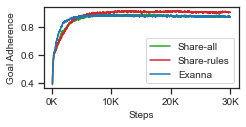

In [11]:
agent_types = ['health', 'freedom']
agent_labels = np.array(["Satisfaction_for_{}_agents".format(x) for x in agent_types])
sns.set_theme(style="ticks")

fig, ax = plt.subplots()
# ax.set(xlabel = 'Steps', ylabel = 'Goal Adherence')

ax.set_xlabel('Steps', fontsize=10, fontweight='normal')
ax.set_ylabel('Goal Adherence', fontsize=10, fontweight='normal')

ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

plt.rcParams["figure.figsize"] = (3.5,1.5)
plt.rc('font', weight='normal')
plt.rc('legend', fontsize=10)

for idx in range(len(file_names)):   
    for agentId in range(len(agent_types)):
        agent_label = agent_labels[agentId]
        if agent_types[agentId] == 'health':
            show_label = labels[idx] # + ": " + agent_types[agentId]
            dataframes[idx][agent_labels[agentId]] = dataframes[idx][agent_labels[agentId]].rolling(rolling_frame).mean()
#             dataframes[idx][agent_labels[agentId]].plot(color=colors[idx * 2 + agentId], label=show_label)
            dataframes[idx][agent_labels[agentId]].plot(color=colors[idx], label=show_label)

ax.legend()

current_labels = plt.gca().get_xticks()
current_labels = [int(x)/1000 for x in current_labels]
xlabels = ['{:,.0f}'.format(x) + 'K' for x in current_labels]
plt.gca().set_xticklabels(xlabels)

plt.savefig(figure_path + "Agent_Goal_Adherence_health.pdf", format="pdf", bbox_inches="tight")
plt.show()

<ipython-input-12-f6d4110f08b5>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xlabels)


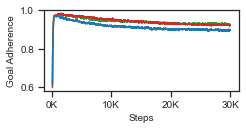

In [12]:
agent_types = ['health', 'freedom']
agent_labels = np.array(["Satisfaction_for_{}_agents".format(x) for x in agent_types])
sns.set_theme(style="ticks")

fig, ax = plt.subplots()
# ax.set(xlabel = 'Steps', ylabel = 'Goal Adherence')

ax.set_xlabel('Steps', fontsize=10, fontweight='normal')
ax.set_ylabel('Goal Adherence', fontsize=10, fontweight='normal')

ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

plt.rcParams["figure.figsize"] = (3.5,1.5)
plt.rc('font', weight='normal')
plt.rc('legend', fontsize=10)

for idx in range(len(file_names)):   
    for agentId in range(len(agent_types)):
        agent_label = agent_labels[agentId]
        if agent_types[agentId] == 'freedom':
            show_label = labels[idx] # + ": " + agent_types[agentId]
            dataframes[idx][agent_labels[agentId]] = dataframes[idx][agent_labels[agentId]].rolling(rolling_frame).mean()
#             dataframes[idx][agent_labels[agentId]].plot(color=colors[idx * 2 + agentId], label=show_label)
            dataframes[idx][agent_labels[agentId]].plot(color=colors[idx], label=show_label)

# ax.legend()

current_labels = plt.gca().get_xticks()
current_labels = [int(x)/1000 for x in current_labels]
xlabels = ['{:,.0f}'.format(x) + 'K' for x in current_labels]
plt.gca().set_xticklabels(xlabels)

plt.savefig(figure_path + "Agent_Goal_Adherence_freedom.pdf", format="pdf", bbox_inches="tight")
plt.show()

<ipython-input-22-13a0ace07e7f>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xlabels)


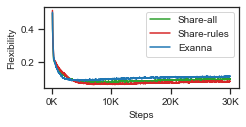

In [22]:
attribute = 'Satisfaction_Per_Interaction'
sns.set_theme(style="ticks")

fig, ax = plt.subplots()
# ax.set(xlabel = 'Steps', ylabel = 'Goal Adherence')

ax.set_xlabel('Steps', fontsize=10, fontweight='normal')
ax.set_ylabel('Flexibility', fontsize=10, fontweight='normal')

ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

plt.rcParams["figure.figsize"] = (3.5,1.5)
plt.rc('font', weight='normal')
plt.rc('legend', fontsize=10)
   
for idx in range(len(file_names)):
    dataframes[idx][attribute] = 1 - dataframes[idx][attribute].rolling(rolling_frame).mean()
    dataframes[idx][attribute].plot(color=colors[idx], label=labels[idx])

ax.legend()

current_labels = plt.gca().get_xticks()
current_labels = [int(x)/1000 for x in current_labels]
xlabels = ['{:,.0f}'.format(x) + 'K' for x in current_labels]
plt.gca().set_xticklabels(xlabels)

plt.savefig(figure_path + "Flexibility.pdf", format="pdf", bbox_inches="tight")
plt.show()


<ipython-input-23-8ea59ff3ca86>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xlabels)


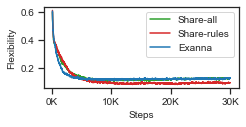

In [23]:
agent_types = ['health', 'freedom']
agent_labels = np.array(["Satisfaction_for_{}_agents".format(x) for x in agent_types])
sns.set_theme(style="ticks")

fig, ax = plt.subplots()
# ax.set(xlabel = 'Steps', ylabel = 'Goal Adherence')

ax.set_xlabel('Steps', fontsize=10, fontweight='normal')
ax.set_ylabel('Flexibility', fontsize=10, fontweight='normal')

ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

plt.rcParams["figure.figsize"] = (3.5,1.5)
plt.rc('font', weight='normal')
plt.rc('legend', fontsize=10)

for idx in range(len(file_names)):   
    for agentId in range(len(agent_types)):
        agent_label = agent_labels[agentId]
        if agent_types[agentId] == 'health':
            show_label = labels[idx] # + ": " + agent_types[agentId]
            dataframes[idx][agent_labels[agentId]] = 1 - dataframes[idx][agent_labels[agentId]].rolling(rolling_frame).mean()
            dataframes[idx][agent_labels[agentId]].plot(color=colors[idx], label=show_label)

ax.legend()

current_labels = plt.gca().get_xticks()
current_labels = [int(x)/1000 for x in current_labels]
xlabels = ['{:,.0f}'.format(x) + 'K' for x in current_labels]
plt.gca().set_xticklabels(xlabels)

plt.savefig(figure_path + "Flexibility_health.pdf", format="pdf", bbox_inches="tight")
plt.show()

<ipython-input-24-82049848110c>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xlabels)


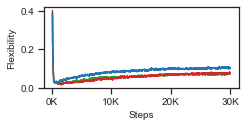

In [24]:
agent_types = ['health', 'freedom']
agent_labels = np.array(["Satisfaction_for_{}_agents".format(x) for x in agent_types])
sns.set_theme(style="ticks")

fig, ax = plt.subplots()
# ax.set(xlabel = 'Steps', ylabel = 'Goal Adherence')

ax.set_xlabel('Steps', fontsize=10, fontweight='normal')
ax.set_ylabel('Flexibility', fontsize=10, fontweight='normal')

ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

plt.rcParams["figure.figsize"] = (3.5,1.5)
plt.rc('font', weight='normal')
plt.rc('legend', fontsize=10)

for idx in range(len(file_names)):   
    for agentId in range(len(agent_types)):
        agent_label = agent_labels[agentId]
        if agent_types[agentId] == 'freedom':
            show_label = labels[idx]
            dataframes[idx][agent_labels[agentId]] = 1 - dataframes[idx][agent_labels[agentId]].rolling(rolling_frame).mean()
            dataframes[idx][agent_labels[agentId]].plot(color=colors[idx], label=show_label)

# ax.legend()

current_labels = plt.gca().get_xticks()
current_labels = [int(x)/1000 for x in current_labels]
xlabels = ['{:,.0f}'.format(x) + 'K' for x in current_labels]
plt.gca().set_xticklabels(xlabels)

plt.savefig(figure_path + "Flexibility_freedom.pdf", format="pdf", bbox_inches="tight")
plt.show()

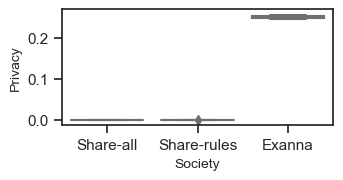

In [15]:
attribute = 'Avg_privacy_loss'
sns.set_theme(style="ticks", palette="pastel")
# dataframe = pd.read_csv(logs_path + 'Summary.csv')
dataframe = pd.read_csv(logs_path + 'stats/Summary.csv') #Edited by Nirav; Sz-Ting to check

plt.rcParams["figure.figsize"] = (3.5,1.5)

sns_plot = sns.boxplot(data=dataframe, x=dataframe.source, y=1-dataframe[attribute])
sns_plot.set(xlabel='Society', ylabel = 'Privacy')
sns_plot.set_xlabel(sns_plot.get_xlabel(), fontdict={'weight': 'normal', 'size': 10})
sns_plot.set_ylabel(sns_plot.get_ylabel(), fontdict={'weight': 'normal', 'size': 10})
fig = sns_plot.get_figure()
fig.savefig(figure_path + "Privacy.pdf", bbox_inches='tight')

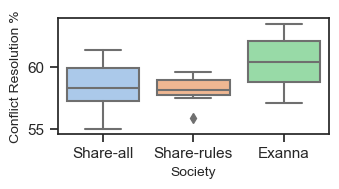

In [16]:
attribute = 'resolution'
sns.set_theme(style="ticks", palette="pastel")
dataframe = pd.read_csv(logs_path + 'stats/Summary.csv') #Edited by Nirav; Sz-Ting to check

plt.rcParams["figure.figsize"] = (3.5,1.5)

sns_plot = sns.boxplot(data=dataframe, x=dataframe.source, y=dataframe[attribute])
sns_plot.set(xlabel='Society', ylabel = 'Conflict Resolution %')
sns_plot.set_xlabel(sns_plot.get_xlabel(), fontdict={'weight': 'normal', 'size': 10})
sns_plot.set_ylabel(sns_plot.get_ylabel(), fontdict={'weight': 'normal', 'size': 10})
fig = sns_plot.get_figure()
fig.savefig(figure_path + "Conflict_resolution.pdf", bbox_inches='tight')
